# CODE Machine Learning
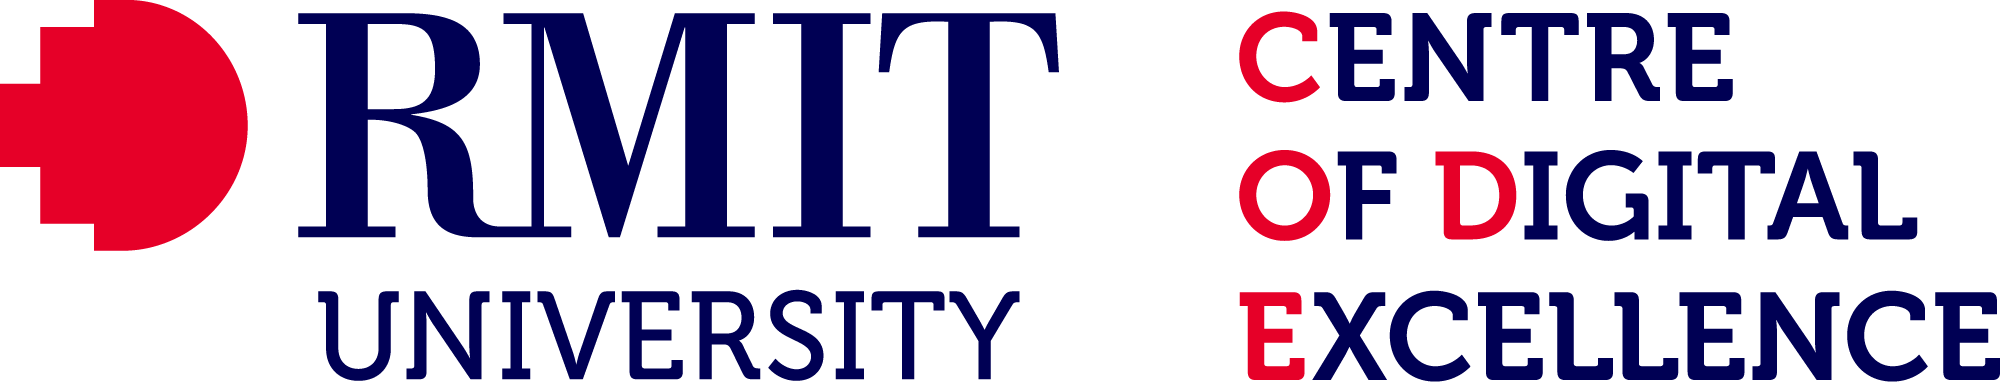
### Background
This program demonstrates how Machine Learning can forecast a future closing price of a chosen stock. This program is for training purposes only and should not be used for real investment decisions.<br>
The program 'scrapes' historical stock price data from the Yahoo! Finance site. These data are used to 'train' a regression algorithm in order to forecast a future closing price for the stock. Three common ML regression algorithms are used: decision tree, linear, and K-Nearest Neigbors. <br>
### How to use
Ensure that you're logged into Google Drive with your account – you'll need this to upload some financial data.<br>
Start at the 'Import Dependencies' block below and work down.<br>
Fill in the fields on the right-hand side of each 'block', then click on the play icon inside the square bracket at the top left of each block.<br> Blocks can be expanded or collapsed by clicking the triangle next to the block name.<br> 
Run each block in sequence from top to bottom; if you change any values, then re-run the sequence all the way to the bottom. 


### 1. Import Dependencies 
Start here. <br>
*   Click the play icon inside the square bracket below.
*   You may receive this message: "Warning: This notebook was not authored by Google..."<br> 
*   Feel free to OK this message, since RMIT CODE authored this program.

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import datetime as dt
from datetime import datetime
import seaborn as sb
plt.style.use('fivethirtyeight')

### 2. Choose a Stock Symbol:
Go to https://finance.yahoo.com/ </br>
*   Find the stock symbol for the company in which you are interested (we use Grab as an example, based on its Nasdaq listing).</br>
*   Go to *Historical Data* and define the relevant time period.</br>
*   Click *Download* to save the .csv file to your hard disk; then upload the .csv file  to your Google Drive (don't save to a sub-folder).

Fill in this info: 
*   *File_Name*: the file name you just uploaded (tip: use your stock symbol), 
*   *Start_Date* and *End_Date*: the period of time you want to train/forecast data. This time period must be within the range of time you chose to download from Yahoo! Finance. The time period selected can make a significant difference to the accuracy of the forecast. 

Click the play icon inside the square bracket below. <br>
You will receive this message: 
"Go to this URL in a browser: [xyz]<br>
Enter your authorization code:"<br>
Follow these instructions and paste the authorization code into the text box indicated.


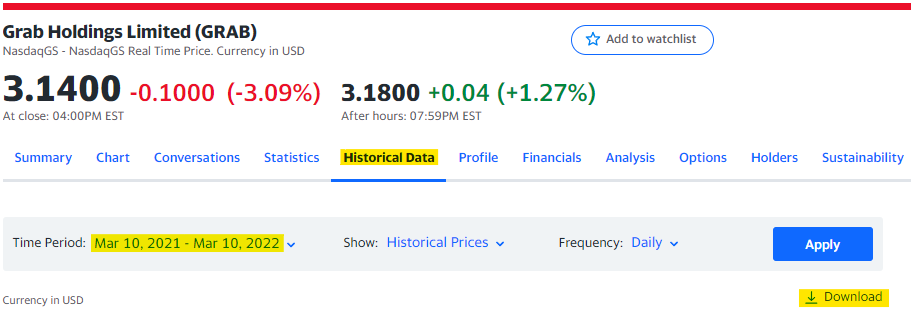

In [ ]:
File_Name= 'TNT.AX' #@param [] {allow-input: true}
Start_Date = '2021-03-10' #@param {type:"date"}
End_Date = '2022-03-08' #@param {type:"date"}

file_uploaded = File_Name.strip() + ".csv"
from google.colab import drive 
drive.mount('/content/gdrive')
dfr=pd.read_csv('gdrive/My Drive/' + file_uploaded)

try: 
  start = datetime.strptime(Start_Date, '%Y-%m-%d').date()
  end = datetime.strptime(End_Date, '%Y-%m-%d').date()
except NameError as error: 
  start = datetime.strptime(Start_Date, '%Y/%m/%d').date()
  end = datetime.strptime(End_Date, '%Y/%m/%d').date()

dfr.reset_index(inplace=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 3. Prepare the data
*Number_of_Recent_days*: input the number of recent days for the system to forecast (tip: start with 10 days maximum).
<br>
*Forecast_future*: tick to forecast a future stock closing price. 

In [ ]:
data_df=dfr[['Date','High','Open','Low','Close']]
try: 
  dfr['Date'] = pd.to_datetime(dfr.Date, format='%Y-%m-%d')
except ValueError as ve:
  dfr['Date'] = pd.to_datetime(dfr.Date, format='%m/%d/%Y' ) 
Number_of_Recent_days =  3#@param {type:"number"}

data_df['Year']=dfr['Date'].dt.year
data_df['Month']=dfr['Date'].dt.month
data_df['Day']=dfr['Date'].dt.day
dataframe=data_df[['Day','Month','Year','High','Open','Low','Close']]

Forecast_future = True #@param {type:"boolean"}
if Forecast_future == True: 
  df = dataframe[['Day', 'Month', 'Year', 'Close']]
else: 
  df = dataframe[['Day','Month','Year','High','Open','Low','Close']]
future_days = Number_of_Recent_days
df['Prediction'] = df[['Close']].shift(-future_days)
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


### 4. Fitting & Training


In [ ]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)
#Create the k-neighbors regressor model
neighbors_numbers = 3#@param {type:"number"}
kn = KNeighborsRegressor(n_neighbors=2)
kn.fit(x_train, y_train) 
#Create the support vector machines
svr = svm.SVR().fit(x_train, y_train)
#Create the neural network
mlp = MLPRegressor()
mlp.fit(x_train, y_train)
#Get the feature data, 
#AKA all the rows from the original data set except the last 'x' days
x_future = df.drop(['Prediction'], 1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


### 5. Forecast & Visualize Results
*Algorithm*: choose which algorithm the program will use for training (it's best to  try all three algorithms to see which is most accurate). <br>
*Historical_data*: tick to display the trained data on a graph. 

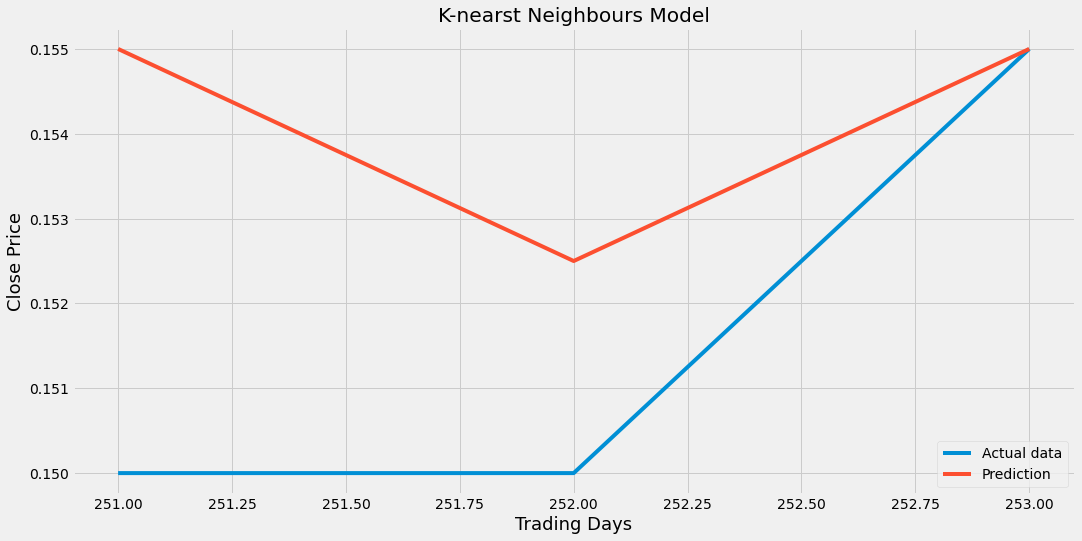

In [ ]:
Algorithm = "K-nearest Neighbours" #@param ["Decision Tree Regressor", "Linear Regression", "K-nearest Neighbours"]
#Algorithm = "Support Vector Machines" #@param ["Decision Tree Regressor", "Linear Regression", "K-nearest Neighbours", "Support Vector Machines", "Multi-layer Perceptron"]
Historical_data = False #@param {type:"boolean"}
plt.figure(figsize=(16,8))
if Algorithm == "Decision Tree Regressor": 
  predictions = tree.predict(x_future)
  plt.title('Decision Tree Regressor Model')
if Algorithm == "Linear Regression": 
  predictions = lr.predict(x_future)
  plt.title('Linear Regression Model')
if Algorithm == "K-nearest Neighbours": 
  predictions = kn.predict(x_future)
  plt.title('K-nearst Neighbours Model')
if Algorithm == ('Support Vector Machines'):
  predictions = svr.predict(x_future)
  plt.title('Support Vector Machines Model')
if Algorithm == ('Multi-layer Perceptron'):
  predictions = svr.predict(x_future)
  plt.title('Multi-layer Perceptron Model')
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.xlabel('Trading Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(valid[['Close','Predictions']])
if Historical_data == True:
 plt.plot(df['Close'])
 plt.legend(['Actual data', 'Prediction',  'Historical data'   ], loc='lower right')
else:
 plt.legend(['Actual data',  'Prediction' ], loc='lower right')
plt.show()

### 6. Forecast future closing price
*   *Days_in_the_Future_to_Forecast* - input a value between 1 and 5 to forecast a future closing price for your chosen stock between 1-5 working days into the future.
*   Note that a value >5 days may return a more inaccurate forecast – this is comparable to weather forecasting, where the further into the future we forecast, the less accurate our forecast may become.

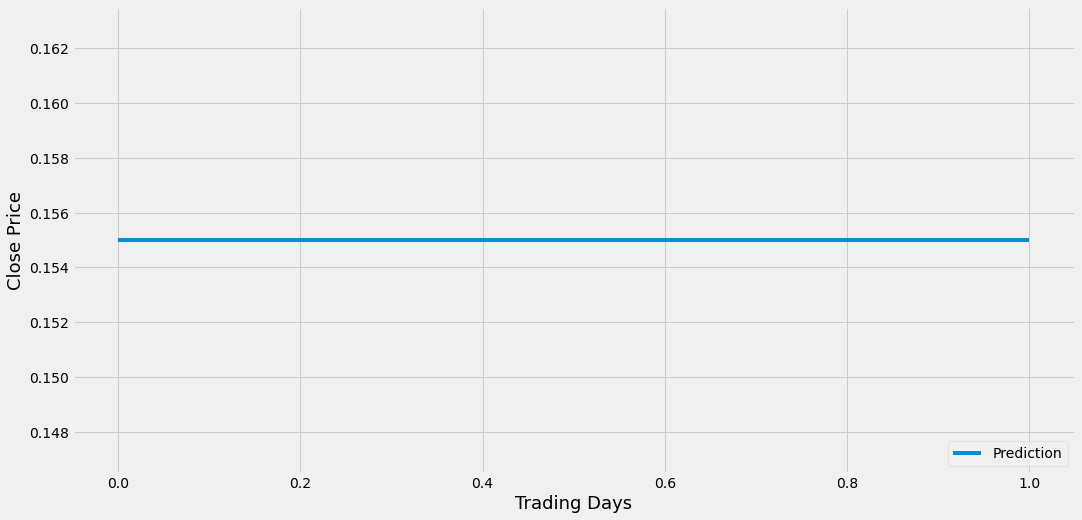

In [ ]:
Days_in_the_Future_to_Forecast = 1#@param {type:"number"}
Historical_data = False #@param {type:"boolean"}

Choose_Algorithm = "K-nearest Neighbors" #@param ["Decision Tree Regressor", "Linear Regression", "K-nearest Neighbors"]
#Choose_Algorithm = "Decision Tree Regressor" #@param ["Decision Tree Regressor", "Linear Regression", "K-nearest Neighbors", "Support Vector Machines","Multi-layer Perceptron"]
last_close =  df['Close'].iloc[-1]
result = [df['Close'].iloc[-1]]
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
for i in range(1, Days_in_the_Future_to_Forecast + 1):
    date_to_predict = end + dt.timedelta(days=i)
    last_close = [[date_to_predict.day, date_to_predict.month, date_to_predict.year, last_close]]
    try: 
      if Choose_Algorithm == "Decision Tree Regressor":
        last_close = tree.predict(last_close)
      if Choose_Algorithm == "Linear Regression":
        last_close = lr.predict(last_close)
      if Choose_Algorithm == "K-nearest Neighbors":
        last_close = kn.predict(last_close)
      if Choose_Algorithm == "Support Vector Machines":
        last_close = svr.predict(last_close)
      if Choose_Algorithm == "Multi-layer Perceptron":
        last_close = mlp.predict(last_close)
    except ValueError as ve:
      print("Please tick on Predict_future in Prep Data block and re-run the program") 
      break
    result = np.append(result, last_close[0])
result = np.array(result)
#Plot the data
plt.figure(figsize=(16,8))
plt.xlabel('Trading Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(result)
if Historical_data == True:
 plt.plot(df['Close'])
 plt.legend(['Actual data', 'Prediction',  'Historical data'], loc='lower right')
else:
 plt.legend(['Prediction' ], loc='lower right')
plt.show()
